In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [2]:
ticker = 'PG'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start = '2007-1-1')['Adj Close']

In [3]:
log_returns = np.log(1+data.pct_change())

In [4]:
log_returns.tail()

,PG
Date,
2019-06-27,0.000456
2019-06-28,-0.001185
2019-07-01,0.007632
2019-07-02,0.008920
2019-07-03,0.023055


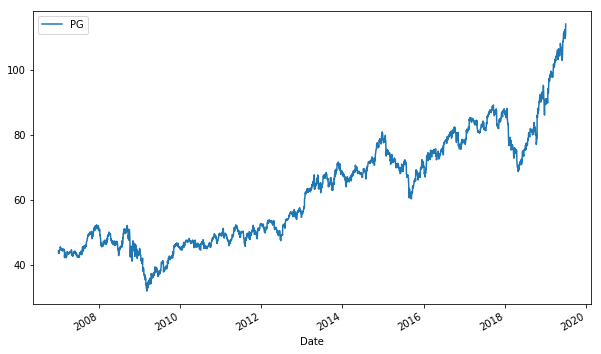

In [7]:
data.plot(figsize=(10,6));

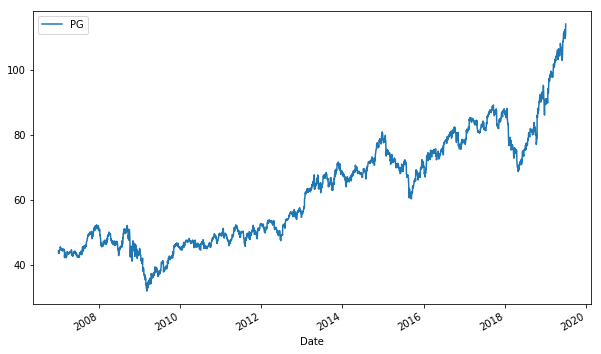

In [8]:
data.plot(figsize=(10,6));

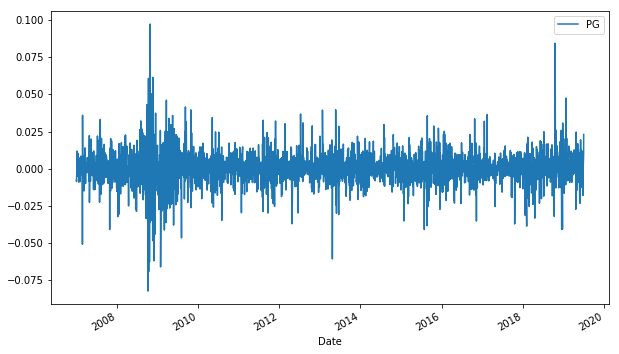

In [9]:
log_returns.plot(figsize=(10,6))

In [10]:
u = log_returns.mean()
u

PG    0.000301
dtype: float64

In [11]:
var = log_returns.var()
var

PG    0.00012
dtype: float64

In [13]:
drift = u - (0.5*var)
drift

PG    0.000241
dtype: float64

In [14]:
stdev = log_returns.std()
stdev

PG    0.010959
dtype: float64

In [16]:
type(drift)

pandas.core.series.Series

In [17]:
type(stdev)

pandas.core.series.Series

In [18]:
np.array(drift)

array([0.00024096])

In [19]:
drift.values

array([0.00024096])

In [20]:
stdev.values

array([0.01095862])

In [23]:
# Z, 95% chance of occurance, distance between the mean is 1.6 std.
norm.ppf(0.95)

1.6448536269514722

In [27]:
# we insert two arguments to create a 10x2 matrix
x = np.random.rand(10,2)
x

array([[0.34347719, 0.45497663],
       [0.03460037, 0.3791485 ],
       [0.87524106, 0.4032053 ],
       [0.44018725, 0.51193293],
       [0.70462846, 0.72871506],
       [0.034573  , 0.83951246],
       [0.94582725, 0.92854554],
       [0.08781395, 0.56207414],
       [0.23029482, 0.96640196],
       [0.01978361, 0.05600633]])

In [28]:
norm.ppf(x)

array([[-0.40299163, -0.11309749],
       [-1.81710694, -0.30771791],
       [ 1.1515212 , -0.2450592 ],
       [-0.1504945 ,  0.02991589],
       [ 0.53775952,  0.60893145],
       [-1.81746468,  0.99245612],
       [ 1.60567425,  1.46504395],
       [-1.35434007,  0.15623002],
       [-0.73787628,  1.83036037],
       [-2.05823867, -1.58921149]])

In [32]:
z = norm.ppf(np.random.rand(10,2))
z

array([[ 0.07218502, -0.12982868],
       [-0.10144339,  0.34228018],
       [-0.07096331, -0.39611769],
       [ 1.19718555, -1.98865148],
       [ 0.22869793, -1.21844095],
       [ 1.06572451,  2.14773771],
       [-0.48416194, -0.4878741 ],
       [-0.52385114,  0.88811073],
       [-0.97902299,  2.15631819],
       [ 0.19887914, -0.96412751]])

In [38]:
# Calculate stock price for the next 1000 days
t_intervals = 1000
iterations = 10

In [45]:
daily_returns = np.exp(drift.values+stdev.values*norm.ppf(np.random.rand(t_intervals,iterations)))

In [46]:
# 10 sets of 1000 values
daily_returns

array([[1.01721262, 1.00592268, 0.99497355, ..., 1.01632407, 0.99348801,
        0.99531639],
       [1.00493608, 0.98955624, 0.99835781, ..., 1.01323897, 0.99316986,
        1.01716606],
       [0.98625228, 1.01118807, 0.99118184, ..., 1.00450624, 0.99269146,
        1.00240764],
       ...,
       [1.00627196, 1.00803898, 0.99540126, ..., 0.98390901, 0.99190266,
        1.0031968 ],
       [0.9937735 , 0.99704263, 1.00559749, ..., 0.98726049, 0.98646503,
        1.00984075],
       [0.99038592, 0.99166588, 1.00024189, ..., 0.98899142, 1.01154724,
        0.98831064]])

In [48]:
# S0 = stock price at t = 0 (today)
S0 = data.iloc[-1]
S0

PG    114.080002
Name: 2019-07-03 00:00:00, dtype: float64

In [49]:
price_list = np.zeros_like(daily_returns)

In [50]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [51]:
# we set the first row (0) as the Stock price today
price_list[0]=S0
price_list

array([[114.08000183, 114.08000183, 114.08000183, ..., 114.08000183,
        114.08000183, 114.08000183],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [52]:
for t in range (1,t_intervals):
        price_list[t] = price_list[t-1]*daily_returns[t]

In [53]:
price_list

array([[114.08000183, 114.08000183, 114.08000183, ..., 114.08000183,
        114.08000183, 114.08000183],
       [114.64310963, 112.88857816, 113.89266109, ..., 115.59030331,
        113.30081951, 116.03830619],
       [113.06702879, 114.15158394, 112.8883372 , ..., 116.11118097,
        112.47275598, 116.31768415],
       ...,
       [153.36603342, 130.94822549, 126.41245411, ..., 171.02493186,
        114.78844442, 170.65699862],
       [152.41109944, 130.56096344, 127.12004711, ..., 168.84615874,
        113.23478652, 172.3363918 ],
       [150.9458071 , 129.47285259, 127.15079644, ..., 166.98740221,
        114.54233617, 170.32188898]])

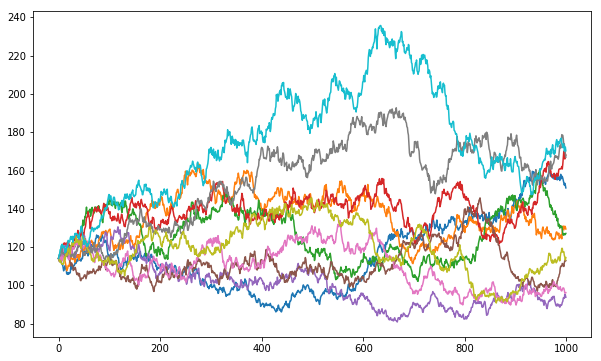

In [54]:
plt.figure(figsize=(10,6))
plt.plot(price_list)